
<h2><span style="color:blue">1. Busca y descarga el conjunto de datos “Chess” del repositorio UCI
Machine Learning.</span></h2>

In [1]:
import pandas as pd

file = 'krkopt.data'
col_names = ['King-W col','King-W row','Rook-W col','Rook-W row','King-B col','King-B row','result']


<h2><span style="color:blue">2. Cárgalo adecuadamente en un Pandas DataFrame.</span></h2>

In [2]:
df = pd.read_csv(file, names = col_names)
df.dtypes

King-W col    object
King-W row     int64
Rook-W col    object
Rook-W row     int64
King-B col    object
King-B row     int64
result        object
dtype: object

In [3]:
df.shape

(28056, 7)

In [4]:
df.head()

,King-W col,King-W row,Rook-W col,Rook-W row,King-B col,King-B row,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [5]:
# Identificar desequilibrio de clases
class_distribution = df.groupby('result').size()
print(class_distribution)

result
draw        2796
eight       1433
eleven      2854
fifteen     2166
five         471
four         198
fourteen    4553
nine        1712
one           78
seven        683
six          592
sixteen      390
ten         1985
thirteen    4194
three         81
twelve      3597
two          246
zero          27
dtype: int64


array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

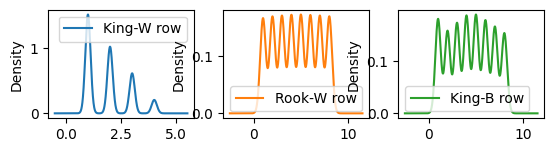

In [6]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)


<h2><span style="color:blue">3. Transforma las variables, que son todas categóricas, en numéricas.</span></h2>

Se va a utilizar **OneHotENcoder**

In [7]:
from pandas import read_csv 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random, time, numpy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm 

SVC = svm.SVC()
seed = random.seed(time.time())

Se asignan los **INPUTS** a una variable para que sea **X**

También, se rellenan los valores nulos con un 0

In [8]:
input_data = df[df.columns[:-1]]
input_data= input_data.fillna(0)


### Primero

Divido los datos entre los inputs y el output

In [9]:
X = input_data

# Scaler ya detecta la variable y sabe que es un problema de clasificacion
# Nunca se transforma la variable de salida
Y = df['result']

### Segundo

Divido con la funcion **train_test_split**

Le paso todo el conjunto de datos

Esto me divide en 70% para entrenamiento y 30% para test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

### Variables de tipo numerico

Dentro del conjunto de entrenamiento selecciono las variables que sean de tipo numerico

No van a necesitar ningun atransformacion con ONE HOT ENCODER

In [11]:
num_X_train = X_train.select_dtypes(include=['int','float'])
num_X_test = X_test.select_dtypes(include=['int','float'])

#### Standar Scaler

In [12]:
stdScaler = StandardScaler()
stdScaler.fit(num_X_train)

StandardScaler()

Variables categoricas que he generado con el conjunto de entrenamiento.

In [13]:
resc_X_train = pd.DataFrame(stdScaler.transform(num_X_train),columns=num_X_train.columns)
resc_X_test = pd.DataFrame(stdScaler.transform(num_X_test),columns=num_X_test.columns)

### Variables de tipo categorico

En este caso no tengo ninguna variable de tipo numerico.

La funcion **.select_dtypes()** devuelve un dataframe

In [14]:
cat_X_train = X_train.select_dtypes(include=['object'])
cat_X_test = X_test.select_dtypes(include=['object'])

### Instancio la clase ONEHOT ENCODER

Genero un objeto para trabajar con el 

In [15]:
ohe = OneHotEncoder(drop = 'if_binary')

Ahora entreno y genero un **modelo de transformacion** con OneHot Encoder

Va a mirar en las variables catagoricas cuantas etiquetas diferentes hay, y se las va a guardar

Para cada etiqueta generar una transformacion

El modelo ha sido creado solamente con los datos de **entrenamiento**

In [16]:
ohe.fit(cat_X_train)

OneHotEncoder(drop='if_binary')

### Finalmente


Ahora transformo esas variabels categoricas del conjunto de entrenamiento con el **objeto** que he creado, y que ya previmente he entrenado

De esta manera genero un modelo de transformacion

Es decir un nuevo dataframe con los datos ya trasformados

In [17]:
resc_X_train[ohe.get_feature_names_out()] = ohe.transform(cat_X_train).toarray()
resc_X_test[ohe.get_feature_names_out()] = ohe.transform(cat_X_test).toarray()

In [18]:
resc_X_train.shape

(19639, 23)

In [19]:
resc_X_train.head()

,King-W row,Rook-W row,King-B row,King-W col_a,King-W col_b,King-W col_c,King-W col_d,Rook-W col_a,Rook-W col_b,Rook-W col_c,...,Rook-W col_g,Rook-W col_h,King-B col_a,King-B col_b,King-B col_c,King-B col_d,King-B col_e,King-B col_f,King-B col_g,King-B col_h
0,0.162724,1.526254,1.586325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.162724,-1.536435,0.694700,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.919474,1.088727,-0.196926,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.919474,-0.223854,-0.196926,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.162724,1.088727,0.694700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Con esto consigo un Dataset de training con todos los valores numéricos.

Sin embargo, la cantidad de columnas ha crecido.

In [20]:
resc_X_train.dtypes

King-W row      float64
Rook-W row      float64
King-B row      float64
King-W col_a    float64
King-W col_b    float64
King-W col_c    float64
King-W col_d    float64
Rook-W col_a    float64
Rook-W col_b    float64
Rook-W col_c    float64
Rook-W col_d    float64
Rook-W col_e    float64
Rook-W col_f    float64
Rook-W col_g    float64
Rook-W col_h    float64
King-B col_a    float64
King-B col_b    float64
King-B col_c    float64
King-B col_d    float64
King-B col_e    float64
King-B col_f    float64
King-B col_g    float64
King-B col_h    float64
dtype: object


<h2><span style="color:blue">4. Aplica el método Filter de selección de características SelectKBest para
conseguir un ranking de importancia de características según los
estadísticos pertinentes al tipo de variable de entrada y tipo de
problema.</span></h2>


<span style="color:red">Hay que tener en cuenta la varaiable con la que estemos trabajando a la hora de escojer trabajar con **filter**</span>.

Usualmente se aplica la variable de **Pearson**

Pero si una de las variables es **categorica** es **IMPOSIBLE** aplicar **Pearson**

En nuestro caso tenemos variables categoricas y numéricas, nuestro problema es de clasificacion.

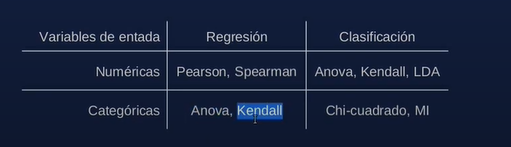

In [21]:
from IPython.display import Image
Image(filename='2.PNG')

Lo que se va a hacer es comparar las variables de **entrada** con las variables de **salida** para ver cuales estan más correlacionadas y eliminar el resto

Para esto hay un algoritmo en **Scaler** 

<span style="color:red">**SelectKBest**</span>.

Tenemos que hacer un estudio de estadistica descriptiva para ver la **correlacion** entre variables.

Queremos eliminar las variables que estén fuertemente correladas entre sí y **NO** con la variable de salida

Esto tambén se vio en la clase 2



<span style="color:blue">**f_classif**</span> es igual a <span style="color:red">**ANOVA**</span> porque aquí estoy con un problema de clasificación con variables numéricas

In [22]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # ANOVA

<span style="color:blue">**k = 5**</span> es el numero maximo de variable que tendré tras el proceso de seleccion

En este caso le digo que me quiero quedar con las mejores 5 variables

Dentro de <span style="color:blue">**Aquellas que esten mas correladas entre ellas** </span> y la variable de  **salida**

In [23]:
filterKB = SelectKBest(score_func = f_classif, k = 6)

Aqui entrenamos al objeto a traves de l metodo **fit**

Lo que hace es tratar de averigar la corelación entre la variabels de entrada y la salida.

In [24]:
# Esto lo hago para que ell Dataset the Y tenga el mismo tamaño que "resc_X_train"
# COmo a "resc_X_train" le quitamos la parte de test tiene menos registros.
Y.drop(Y.index[19639:28056], inplace=True)

filter_model = filterKB.fit(resc_X_train, Y)

Una vez que termina el objeto <span style="color:blue">**SelectKBest**</span> queda configurado de tal modo que tiene un atributo que me dice cuanta es la correalacion entre las variables de entrada con las de la salida

Entonces viendo eso ya puedo saber si **5** es un buen valor o tengo que acomodarlo más


Aqui la variables con mayor correlacion son aquellas que tienen un **número mayor**.

Este es un análisis muy dependiendo de las necesidades

In [25]:
# SCORE me da la informacion de corelación.
print(filter_model.scores_)

[0.9715915  0.76253245 0.74464199 0.48262429 0.79881551 0.91764097
 0.95221846 1.93806381 0.97712638 1.19943344 1.56657442 0.80779485
 0.71144854 0.66633938 2.15928444 1.20664274 1.19252223 1.62250778
 0.89257225 0.85144342 1.29563757 1.05894246 0.96211807]


Según la tabla sería bueno quedarme con la variables que tienen una correlacion por encima de 1.10.  En este caso serán 6

In [26]:
selected = filter_model.transform(resc_X_train)

In [27]:
pd.DataFrame(selected).head()

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0



<h2><span style="color:blue">5. Realiza un gráfico de barras con la importancia de cada característica
para cada uno de los estadísticos utilizados. ¿Coinciden las tres
características más importantes en todos los casos?</span></h2>

<AxesSubplot: ylabel='Frequency'>

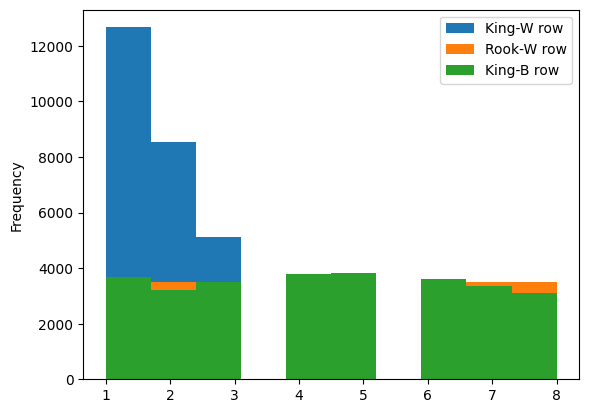

In [28]:
df.plot(kind= 'hist')


<AxesSubplot: ylabel='Frequency'>

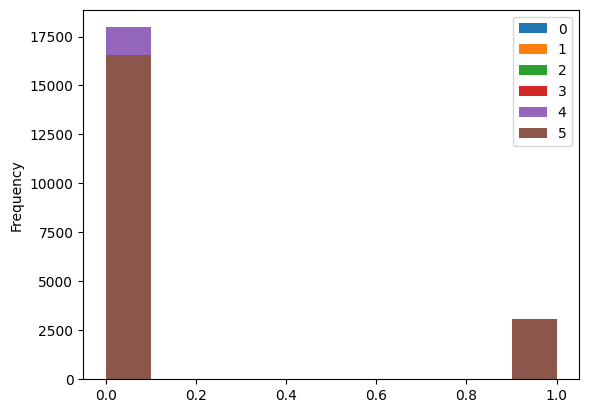

In [31]:
pd.DataFrame(selected).plot(kind= 'hist')

<AxesSubplot: ylabel='Frequency'>

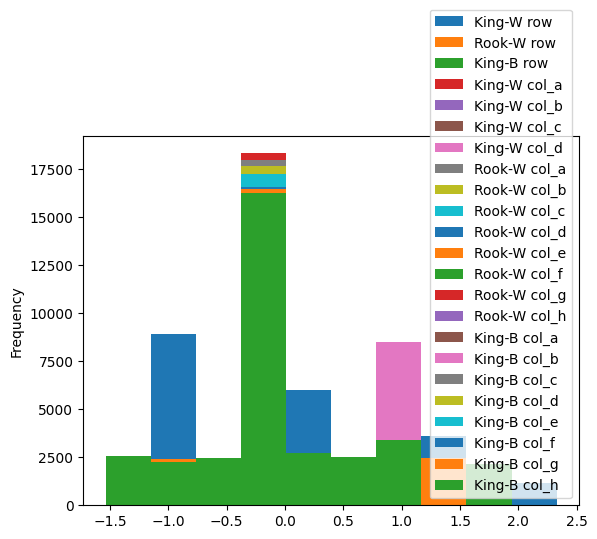

In [32]:
resc_X_train.plot(kind= 'hist')